In [16]:
# Install dependencies
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from datetime import datetime

In [18]:
# Import data
data = pd.read_csv("bank_transactions_data_2.csv")

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [19]:
# Check for missing values: No missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


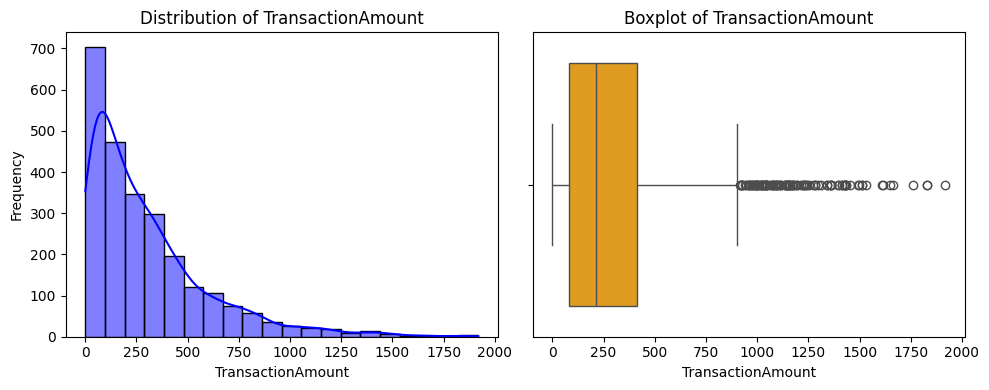

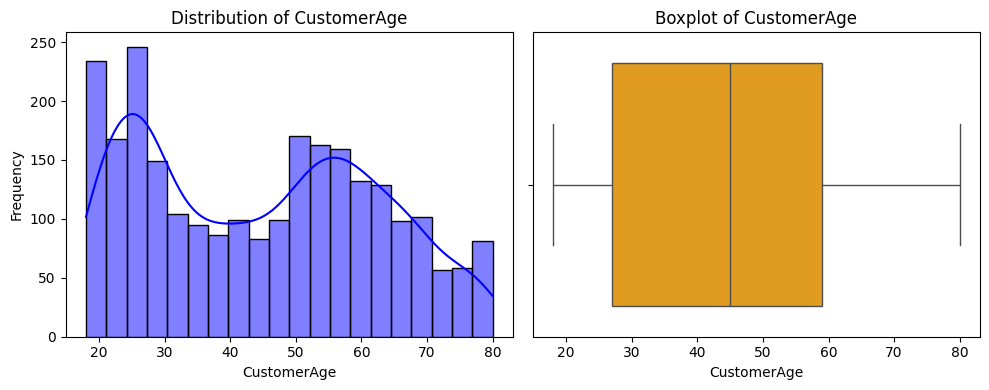

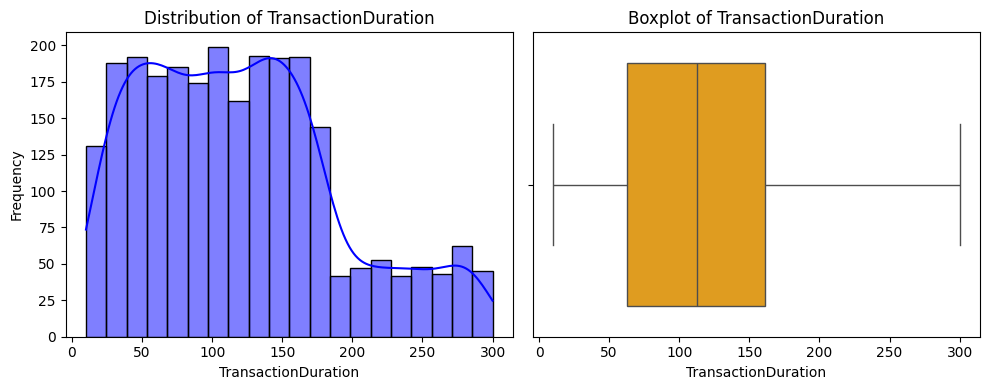

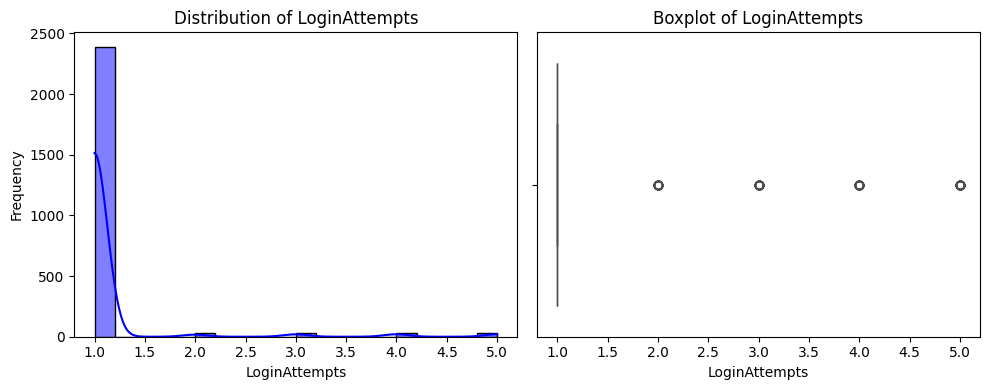

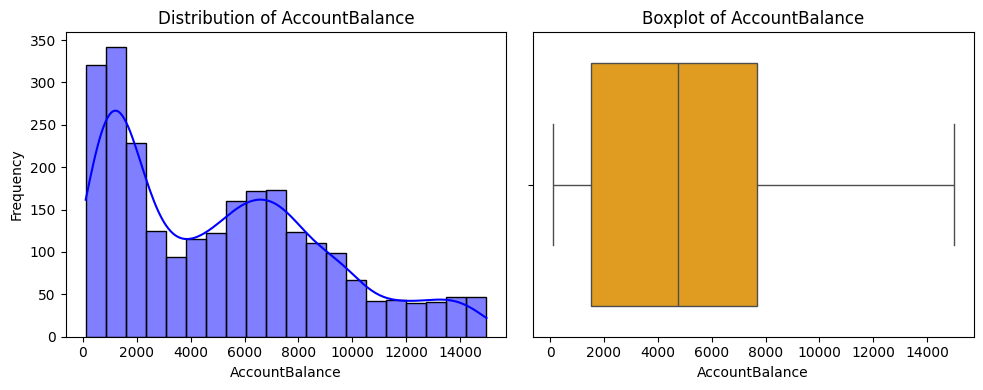

In [20]:
# Data visualisation (univariate analysis)

# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Plot univariate graphs
# For numeric columns: Histograms and Boxplots
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

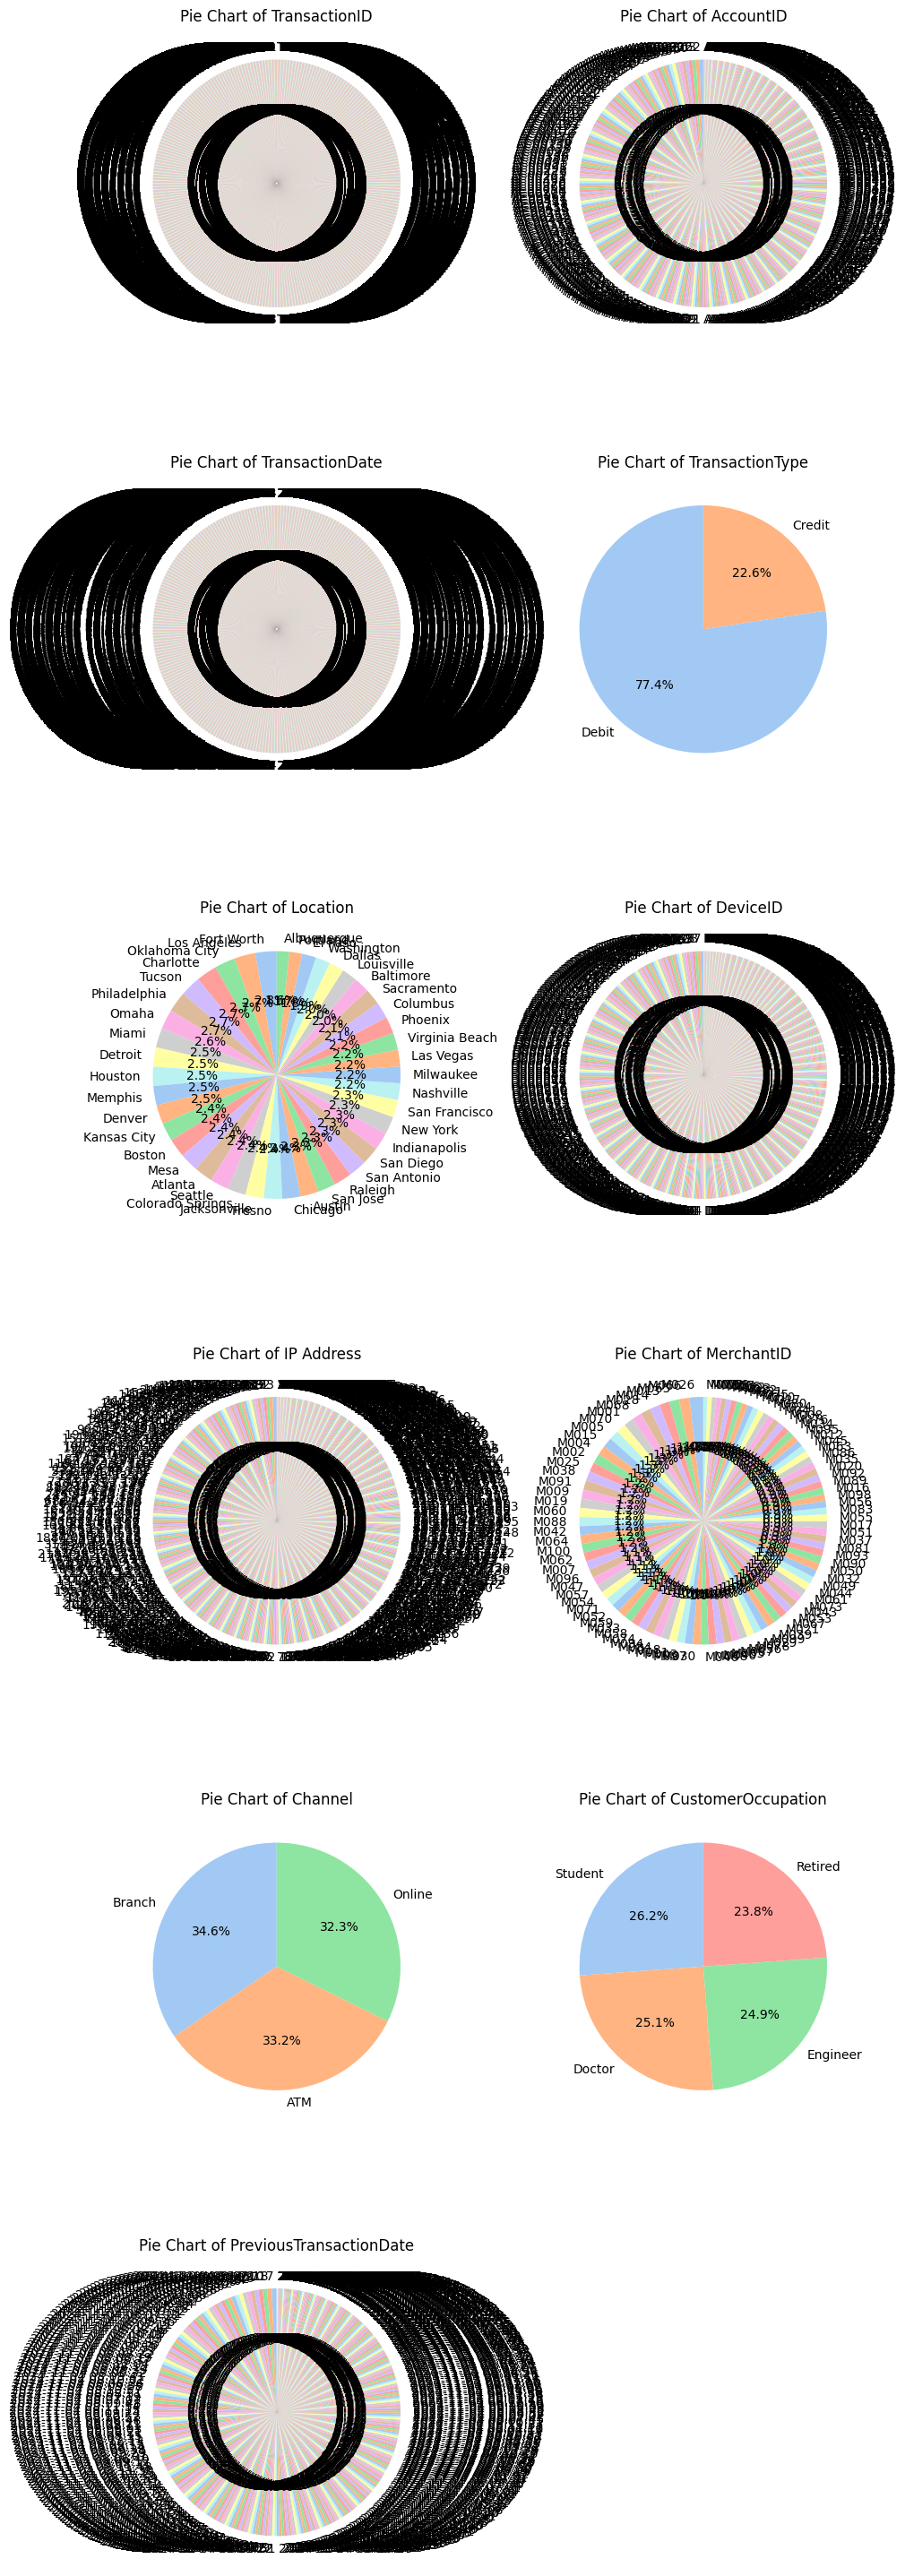

In [21]:
# Data visualisation (univariate analysis) - Categorical columns

# Define the number of columns you want per row
num_cols = 2  # Adjust this based on your preference
num_rows = -(-len(categorical_cols) // num_cols)  # Calculate rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))

# Flatten axes array if there's more than one row
axes = axes.flatten() if num_rows > 1 else [axes]

for i, col in enumerate(categorical_cols):
    data[col].value_counts().plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel')
    )
    axes[i].set_title(f'Pie Chart of {col}', fontsize=12)
    axes[i].set_ylabel('')  # Remove default y-axis label

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Correlation Matrix:
                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


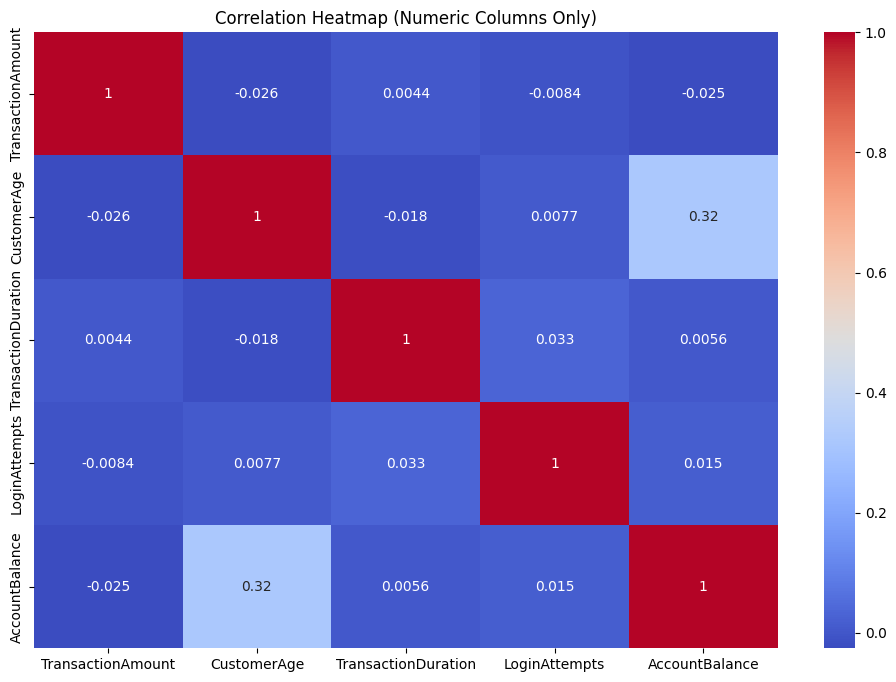

In [22]:
# Data visualisation (HEATMAP)
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric data only
correlation_matrix = numeric_data.corr()

# Verify the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()



In [ ]:
# Data Preprocessing

# Handle categorical data
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'])

# Drop columns that are not needed for the model
data = data.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])

# Preprocessing: Handle datetime columns
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'],format='%Y-%m-%d %H:%M:%S')
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'],format='%Y-%m-%d %H:%M:%S')
data['TimeSinceLastTransaction'] = (data['TransactionDate'] - data['PreviousTransactionDate']).dt.total_seconds()

# Identify numeric and categorical columns
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge', 'TimeSinceLastTransaction']
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Normalize numeric columns
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap
categorical_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols))

# Combine preprocessed data
processed_data = pd.concat([numeric_scaled, categorical_encoded], axis=1)

# Descriptive Statistics
print("Descriptive Statistics:")
print(data[numeric_cols].describe())

# Initialize Fraud column
data['Fraud'] = False

print("Processed Data:")
print(processed_data.describe()) 

In [24]:
# Labelling
'''
I'll apply these rules to label transactions as fraudulent (1) or normal (0) based on:

Unusual Transaction Amounts – Transactions that are in the top 1% or bottom 1% of amounts.
Unusual Locations or Devices – Transactions from a location/device that is unique in the dataset.
High Login Attempts – Transactions with LoginAttempts > 3.
Short Transaction Duration – Transactions completed in less than 5 seconds.
Mismatch in Transaction Patterns – Large online transactions (above 90th percentile).
'''

df = pd.read_csv("bank_transactions_labeled.csv")
df.info()

from sklearn.ensemble import IsolationForest

# Feature Engineering: Create 'TimeSinceLastTransaction'
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["PreviousTransactionDate"] = pd.to_datetime(df["PreviousTransactionDate"])
df["TimeSinceLastTransaction"] = (df["TransactionDate"] - df["PreviousTransactionDate"]).dt.total_seconds()
df.drop(["TransactionDate", "PreviousTransactionDate"], axis=1, inplace=True)

# Convert categorical columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["TransactionType", "Channel", "Location", "DeviceID", "IP Address", "MerchantID"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Select enhanced feature set
features = ["TransactionAmount", "LoginAttempts", "AccountBalance", "TransactionDuration", 
            "TimeSinceLastTransaction", "CustomerAge", "TransactionType", "Channel", "Location"]

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
df["Fraud_IF"] = iso_forest.fit_predict(df[features])

# Convert -1 (fraud) and 1 (normal) to 1 (fraud) and 0 (normal)
df["Fraud_IF"] = df["Fraud_IF"].map({1: 0, -1: 1})

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Reduce `nu` to lower fraud detection rate
ocsvm = OneClassSVM(kernel="rbf", nu=0.1, gamma="scale")  # nu was reduced from 0.1 to 0.01
df["Fraud_OCSVM"] = ocsvm.fit_predict(X_scaled)

# Convert labels: -1 is fraud, 1 is normal
df["Fraud_OCSVM"] = df["Fraud_OCSVM"].apply(lambda x: 1 if x == -1 else 0)

# Print fraud count after tuning
print(df["Fraud_OCSVM"].value_counts())

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Increase `eps` to make DBSCAN less sensitive
dbscan = DBSCAN(eps=1.85, min_samples=20)  # Increased values to reduce noise
df["Fraud_DBSCAN"] = dbscan.fit_predict(X_scaled)

# Label outliers (-1) as fraud
df["Fraud_DBSCAN"] = df["Fraud_DBSCAN"].apply(lambda x: 1 if x == -1 else 0)
print(df["Fraud_DBSCAN"].value_counts())  # Check fraud count

# df["Fraud_Heuristic"] = 0  # Default non-fraud

# # Rule 1: Top 0.5% high-value transactions instead of top 1%
# df.loc[df["TransactionAmount"] > df["TransactionAmount"].quantile(0.995), "Fraud_Heuristic"] = 1

# # Rule 2: Increase login attempts threshold to >15
# df.loc[df["LoginAttempts"] > 15, "Fraud_Heuristic"] = 1

# # Rule 3: Only flag if account balance is negative by more than $500
# df.loc[df["AccountBalance"] - df["TransactionAmount"] < -500, "Fraud_Heuristic"] = 1

# # Rule 4: Rare device or IP detected in <0.2% of transactions
# rare_devices = df["DeviceID"].value_counts()[df["DeviceID"].value_counts() < df.shape[0] * 0.002].index
# df.loc[df["DeviceID"].isin(rare_devices), "Fraud_Heuristic"] = 1

# print(df[["Fraud_IF", "Fraud_OCSVM", "Fraud_DBSCAN", "Fraud_Heuristic"]].sum())
print(df[["FraudLabel","Fraud_IF", "Fraud_OCSVM", "Fraud_DBSCAN"]].sum())

FileNotFoundError: [Errno 2] No such file or directory: 'bank_transactions_labeled.csv'

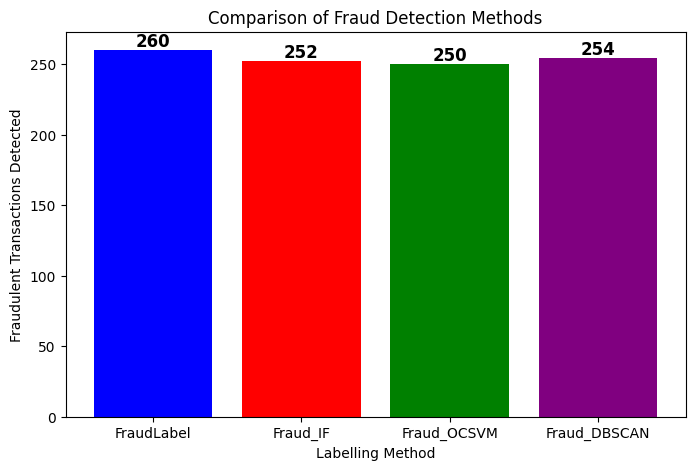

At least 2 methods
     TransactionID AccountID  TransactionAmount  TransactionType  Location  \
26        TX000027   AC00441             246.93                1        24   
85        TX000086   AC00098            1340.19                0         2   
147       TX000148   AC00161             514.95                1        27   
190       TX000191   AC00396            1422.55                1        42   
266       TX000267   AC00178              66.90                0         5   
...            ...       ...                ...              ...       ...   
2288      TX002289   AC00149             336.01                1         7   
2310      TX002311   AC00243             176.52                0        36   
2380      TX002381   AC00098            1173.74                0        41   
2403      TX002404   AC00111            1493.00                1         7   
2423      TX002424   AC00340             332.06                1        39   

      DeviceID  IP Address  MerchantID  Chan

In [4]:
import matplotlib.pyplot as plt

# Compare Fraud Detection Counts
methods = ["FraudLabel", "Fraud_IF", "Fraud_OCSVM", "Fraud_DBSCAN"]
fraud_counts = [df[m].sum() for m in methods]

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, fraud_counts, color=['blue', 'red', 'green', 'purple'])

# Add number labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Labelling Method")
plt.ylabel("Fraudulent Transactions Detected")
plt.title("Comparison of Fraud Detection Methods")

plt.show()

# Compare Agreement Between Methods
df["Total_Fraud_Detections"] = df[["FraudLabel", "Fraud_IF", "Fraud_OCSVM", "Fraud_DBSCAN"]].sum(axis=1)

# Show transactions detected by multiple methods
print("At least 2 methods")
print(df[df["Total_Fraud_Detections"] >= 4])  # Detected by at least 2 methods

df.to_csv("fraud_detection_results.csv", index=False)


In [ ]:
# Split data (training, development, test)